Dataset Preview:
   Transaction ID        Date Customer ID  Gender   Age Product Category  \
0             1.0  24/11/2023     CUST001    Male  34.0           Beauty   
1             2.0  27/02/2023     CUST002  Female  26.0         Clothing   
2             3.0  13/01/2023     CUST003    Male  50.0      Electronics   
3             4.0  21/05/2023     CUST004    Male  37.0         Clothing   
4             5.0  06/05/2023     CUST005    Male  30.0           Beauty   

   Quantity  Price per Unit  Total Amount  
0       3.0            50.0         150.0  
1       2.0           500.0        1000.0  
2       1.0            30.0          30.0  
3       1.0           500.0         500.0  
4       2.0            50.0         100.0  

Missing Data Summary:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


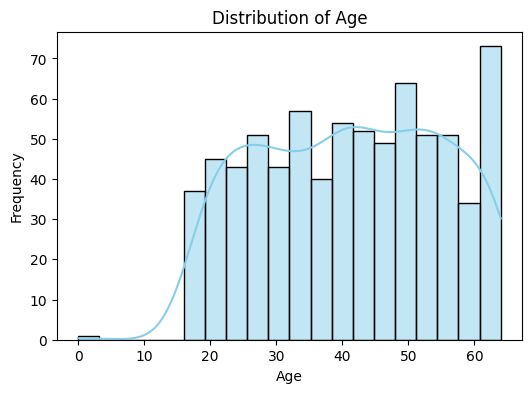

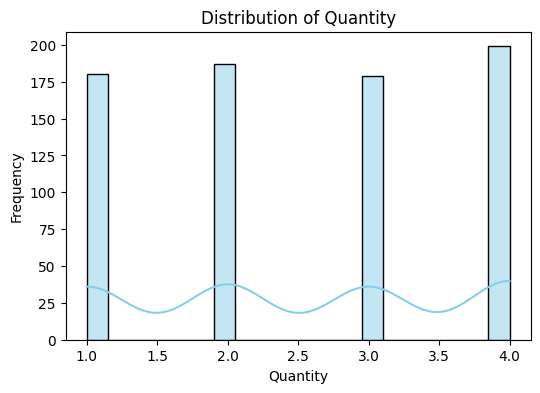

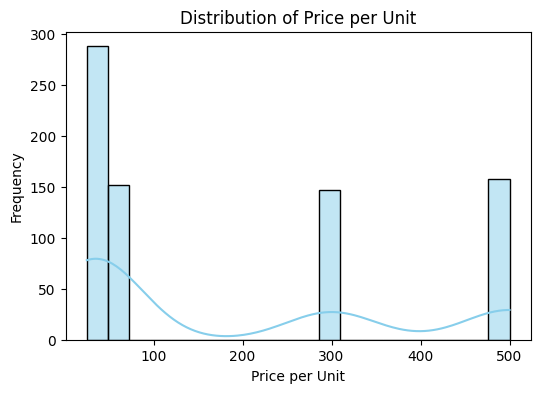

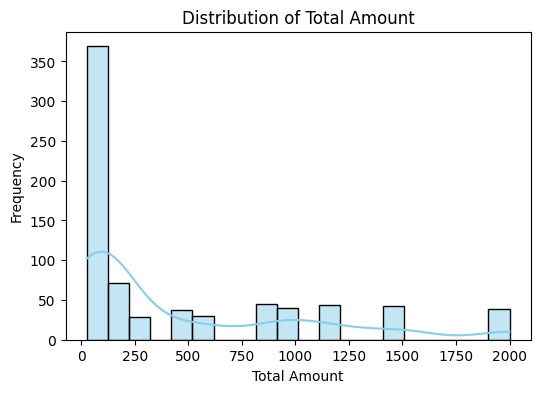

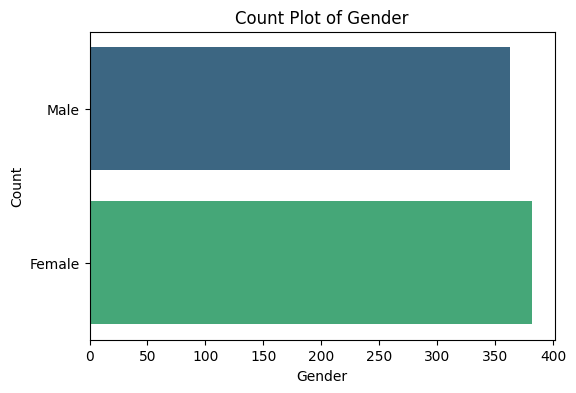

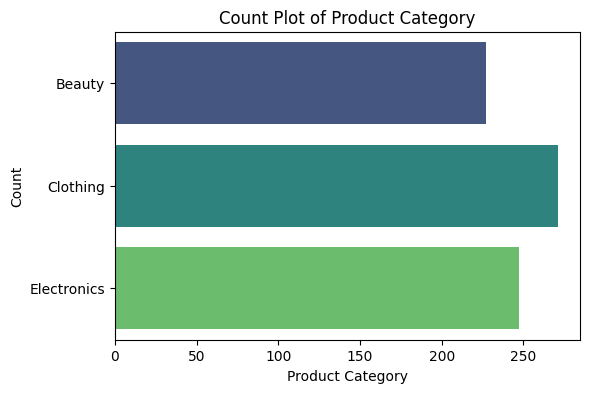

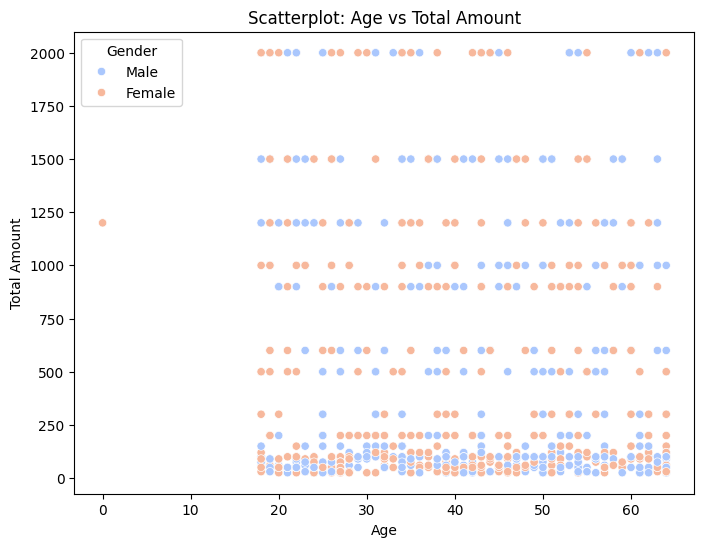

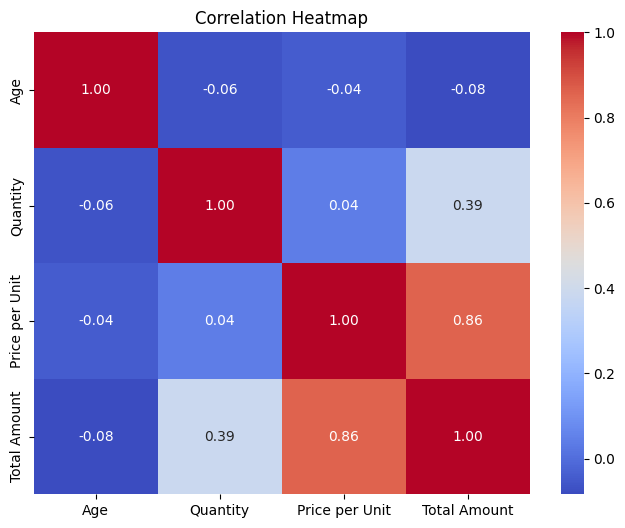

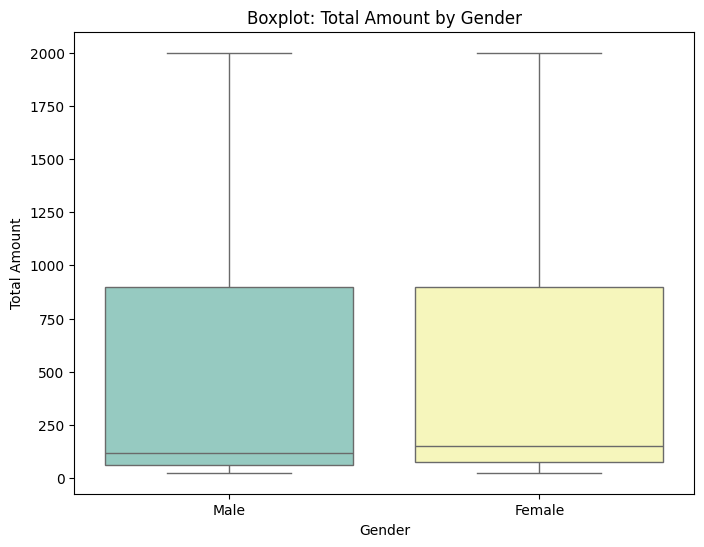

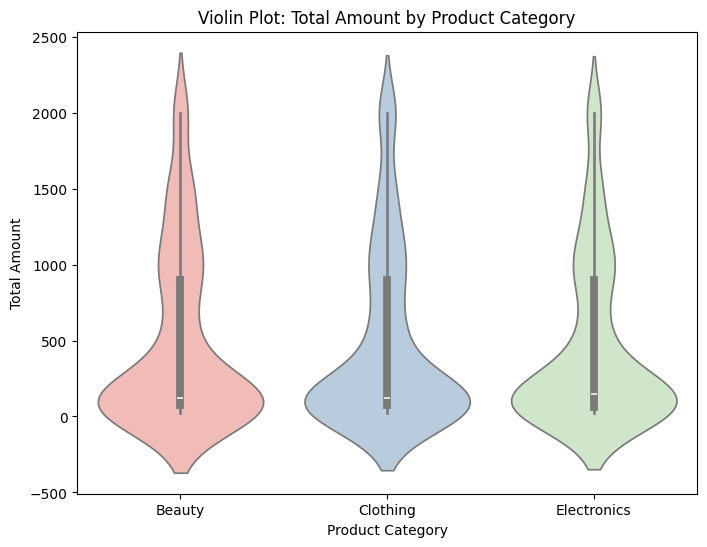

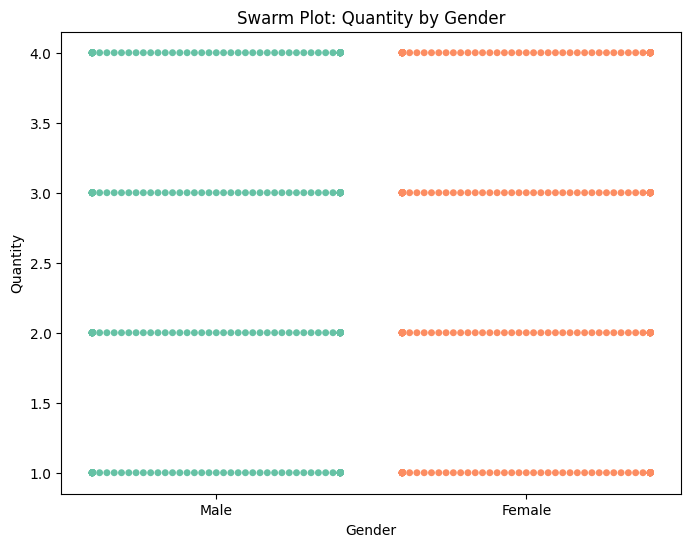

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore warnings
warnings.filterwarnings('ignore')

# 1. Importing the dataset
file_path = "C:\\Users\\joshy\\Documents\\college\\sem6\\ML_LAB\\sales_dataset.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows
print("Dataset Preview:")
print(data.head())

# 2. Taking care of missing data
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check and handle missing values in numeric columns
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_columns)

# Display missing data summary
print("\nMissing Data Summary:")
print(data.isnull().sum())

# 3. Distribution of numeric variables using histogram
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 4. Distribution of nominal variables using count plot
nominal_columns = ['Gender', 'Product Category']
for col in nominal_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 5. Comparison of numeric variables using scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Total Amount', data=data, hue='Gender', palette='coolwarm')
plt.title('Scatterplot: Age vs Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.legend(title='Gender')
plt.show()

# 6. Heatmap for correlation
plt.figure(figsize=(8, 6))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 7. Boxplot to compare values within groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total Amount', data=data, palette='Set3')
plt.title('Boxplot: Total Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

# 8. Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Product Category', y='Total Amount', data=data, palette='Pastel1')
plt.title('Violin Plot: Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

# 9. Swarm Plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Gender', y='Quantity', data=data, palette='Set2')
plt.title('Swarm Plot: Quantity by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity')
plt.show()

# Interpretations:
# 1. The numeric variable distributions reveal the range and skewness in data, with 'Total Amount' showing right skewness.
# 2. Count plots show categorical distributions, with an even split between genders but potential skew in product categories.
# 3. The scatterplot shows a weak correlation between age and total amount.
# 4. The heatmap identifies correlations among numeric columns, useful for feature selection.
# 5. Boxplots and violin plots highlight differences within categorical groups.

